In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy
import statsmodels.api as sm

# Task 3: Load in the Dataset in your Jupyter Notebook

In [19]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [20]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4: Generate Descriptive Statistics and Visualizations

<Axes: title={'center': 'Median value of owner-occupied homes'}, ylabel='Median value of owner-occupied homes in $1000s'>

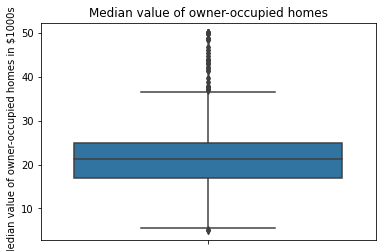

In [21]:
#Boxplot for median value of owner-occupied homes
#MEDV - Median value of owner-occupied homes in $1000's - numerical/continuous
boxplot = sns.boxplot(y='MEDV', data=boston_df)
boxplot.set(ylabel='Median value of owner-occupied homes in $1000s' ,
           title='Median value of owner-occupied homes')
boxplot

Text(0.5, 1.0, 'Mean median value of owner-occupied homes by Charles river variable')

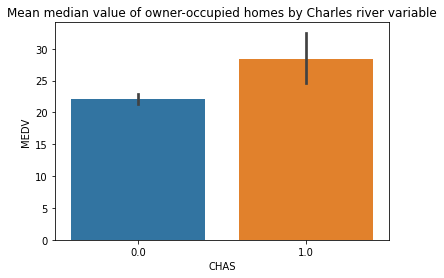

In [30]:
#Bar plot for Charles river variable
#MEDV - Median value of owner-occupied homes in $1000's - numerical/continuous
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) - categorical/nominal
medv_CHAS = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
barplot = sns.barplot(x='CHAS', y='MEDV', data=boston_df).set_title('Mean median value of owner-occupied homes by Charles river variable')
barplot

<Axes: title={'center': 'MEDV variable vs AGE variable'}, xlabel='Age group', ylabel='Median value of owner-occupied homes in $1000s'>

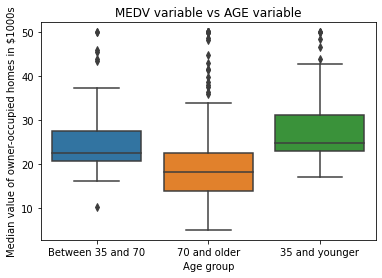

In [31]:
#Boxplot for MEDV variable vs the AGE variable
#MEDV -  Median value of owner-occupied homes in $1000's - numerical/continuous
#AGE - Proportion of owner-occupied units built prior to 1940 - numerical/continuous
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = "70 and older"

boxplot = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = 'Age group',
            ylabel = 'Median value of owner-occupied homes in $1000s',
            title = 'MEDV variable vs AGE variable')
boxplot

[Text(0, 0.5, 'Nitric oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Relationship between NOX and proportion of non-retail business acres per town')]

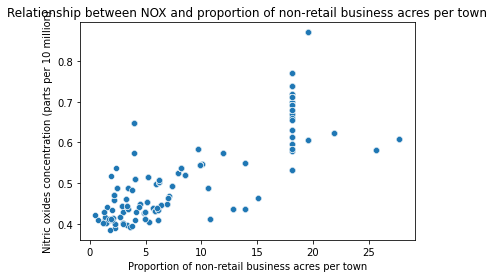

In [32]:
#Scatter plot relationship between NOX and proportion of non-retail business acres per town
#NOX - nitric oxides concentration (parts per 10 million) - numerical/continuous
#INDUS - proportion of non-retail business acres per town - numerical/continuous
scatterplot = sns.scatterplot(x='INDUS', y='NOX',
                     data=boston_df)
scatterplot.set(ylabel = 'Nitric oxides concentration (parts per 10 million)',
                xlabel = 'Proportion of non-retail business acres per town',
                title = 'Relationship between NOX and proportion of non-retail business acres per town')
#Question: What can you say about the relationship?
#Answer: NOX concentration increases with higher proportion of non-retail business acres per town

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

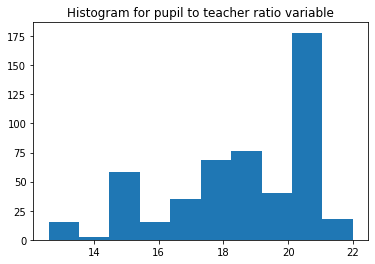

In [33]:
#Histogram for pupil to teacher ratio variable
#PTRATIO - pupil-teacher ratio by town - numerical/continuous
histogram = pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Histogram for pupil to teacher ratio variable')
histogram

# Task 5: Use the appropriate tests to answer the questions provided.

## For each of the following questions;

####    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

####    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

####    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

####    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## Be sure to:

####    State your hypothesis.

####    Use α = 0.05

####    Perform the test Statistics.

####    State the conclusion from the test.

In [34]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#H0 = there is no significant difference in median value of houses bounded by the Charles river
#H1 = there is significant difference in median value of houses bounded by the Charles river
#α = 0.05

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      equal_var=True)

#P-value < 0.05. H0 rejected since P-value is less than α = 0.05. 
#Conclusion: There is a significant difference in the median value of the houses bounded by the Charles river

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [35]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0 = there is no significant difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#H1 = there is significant difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)r
#α = 0.05

group_35_and_younger = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
group_35_70 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70']['MEDV']
group_70_and_older = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group_35_and_younger, 
                                            group_35_70, 
                                            group_70_and_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

#P-value < 0.05. H0 rejected since P-value is less than α = 0.05. 
#Conclusion: There is a difference in the median value of houses between two of the age groups.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [36]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H0 = there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#H1 = there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#α = 0.05

x = boston_df['INDUS'] #independent variable
y = boston_df['NOX'] #dependent variable
x = sm.add_constant(x) #intercept (beta_0)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

#P-value < 0.05 H0 rejected since P-value is less than α = 0.05. 
#conclusion: There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 16 May 2023   Prob (F-statistic):           7.91e-98
Time:                        19:14:36   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#α = 0.05

x = boston_df['DIS'] #independent variable
y = boston_df['MEDV'] #dependent variable
x = sm.add_constant(x) #intercept (beta_0)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

#P-value
#conclusion: The median value of owner occupied homes increases with increased additional weighted distance to the five Boston employment centres

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.21e-08
Time:                        19:14:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""